In [1]:
#Import package
import pandas as pd

In [3]:
#load Dataset
data_analyst_df = pd.read_csv('/Users/akshaytayde/neuefische/Capstone-Project-/dataset/DataAnalyst.csv')
data_scientist_df = pd.read_csv('/Users/akshaytayde/neuefische/Capstone-Project-/dataset/DataScientist.csv')
google_job = pd.read_csv('/Users/akshaytayde/neuefische/Capstone-Project-/dataset/gsearch_jobs 3.csv')

In [4]:
#Rename Columns to lower and replace white spaces with Underscore
data_analyst_df.rename(columns=lambda x : x.lower(), inplace=True)
data_analyst_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
data_scientist_df.rename(columns=lambda x : x.lower(), inplace=True)
data_scientist_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
google_job.rename(columns=lambda x : x.lower(), inplace=True)
google_job.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)

In [5]:
data_analyst_df2 = data_analyst_df[['job_title', 'job_description']].copy()
data_scientist_df2 = data_scientist_df[['job_title', 'job_description']].copy()
google_job_df2 = google_job[['title', 'description']].copy()

In [6]:
data_analyst_df2.head()

,job_title,job_description
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [7]:
#Join Data Analyst Dataset and Data Scientist Dataset
analyst_scientist_df = pd.concat([data_analyst_df2, data_scientist_df2], ignore_index=True)

In [8]:
analyst_scientist_df.head()

,job_title,job_description
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [9]:
#lets rename columns of the google job dataset
google_job_df2 = google_job_df2.rename(columns={'title': 'job_title', 'description': 'job_description'})

In [10]:
#join google dataset to the data analyst /scientist dataset
master_df = pd.concat([analyst_scientist_df, google_job_df2], ignore_index=True)

In [11]:
master_df.head()

,job_title,job_description
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [12]:
# Only leave the job_title column
master_jt_df = master_df[["job_title"]].dropna()
master_jt_df.head()

,job_title
0,"Data Analyst, Center on Immigration and Justic..."
1,Quality Data Analyst
2,"Senior Data Analyst, Insights & Analytics Team..."
3,Data Analyst
4,Reporting Data Analyst


In [13]:
# Import Libraries
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')   # Required for tokenization
nltk.download('wordnet') # Required for lemmatization
nltk.download('popular')
# Instantiate
lemmatizer = WordNetLemmatizer()
# Create our own stop words
stop_words = (                                        \
    "\n ’ the company and of for in to a or years l   \
    other were that ended we at with our included s   \
    firm follows under consolidated have these over   \
    include billion million december which an le from \
    certain le — million had show apple including     \
    as noncurrent current total three are on not is   \
    involving millions shows centers contains      "  \
             ).split()
# Exclusion list of punctuations and numbers
exclist = string.punctuation + string.digits
# Print the exclusion list
print(exclist)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshaytayde/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshaytayde/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/akshaytayde/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/akshaytayde/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/akshaytayde/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/akshaytayde/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_d

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789


[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/akshaytayde/nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package maxent_ne_chunker to
[nltk_data]    |     /Users/akshaytayde/nltk_data...
[nltk_data]    |   Package maxent_ne_chunker is already up-to-date!
[nltk_data]    | Downloading package punkt to
[nltk_data]    |     /Users/akshaytayde/nltk_data...
[nltk_data]    |   Package punkt is already up-to-date!
[nltk_data]    | Downloading package snowball_data to
[nltk_data]    |     /Users/akshaytayde/nltk_data...
[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/akshaytayde/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection

In [14]:
# Create a Function
def clean_texts(text):
    """ Function to perform preprocessing """
    
    # Convert to lower cases
    text = text.lower()
    
    # Remove punctuations and numbers
    text = text.translate(str.maketrans("", "", exclist))
    
    
    # Tokenization
    tokens = word_tokenize(text)
        
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join tokens
    clean_text = " ".join(tokens)
    
    # Return the output
    return clean_text
# Apply the function to all disclosures
master_jt_df['job_title'] = master_jt_df['job_title'].apply(clean_texts)
# View the first 5 rows
master_jt_df.head()

,job_title
0,data analyst center immigration justice cij
1,quality data analyst
2,senior data analyst insight analytics team cus...
3,data analyst
4,reporting data analyst


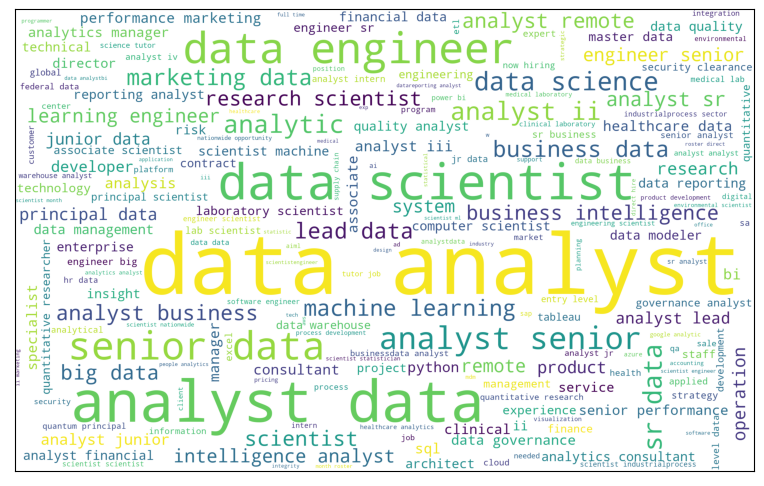

In [15]:
# Import library
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
# Instantiate Word Cloud
wc = WordCloud(width=2400,
               height=1500,
               min_font_size=10,
               background_color='white')
# Generate a word cloud
plt.figure(figsize = (24, 6))
job_title_master = wc.generate(master_jt_df['job_title'].str.cat(sep=" "))
plt.xticks([])
plt.yticks([])
plt.imshow(job_title_master);